In [2]:
from glob import glob
import os 
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['font.sans-serif'] = 'Arial'
sns.set_style('white', {'axes.grid' : False})

def vector(on=False):
    if on:
        sc.set_figure_params(dpi=50, dpi_save=300, vector_friendly=False)
    else:
        sc.set_figure_params(dpi=50, dpi_save=300, vector_friendly=True)
vector(False)

In [2]:
sample_list = ['CRC-P19-T','CRC-P59-T_1','CRC-P59-T_2','CRC-P67-T','LC05-M_DU3','LC05-T_FD3','dcis1','dcis2','slide_RNA']

# SupFigure2

In [14]:
from scipy.stats import linregress

for sample in sample_list:
    rna = sc.read_h5ad(f'../../RNA_cluster/{sample}.rna.h5ad')
    snv = sc.read_h5ad(f'../../SNV_process/norm/{sample}.norm_snv.h5ad')
    snv.obs['snvcount'] = np.sum(snv.X,axis = 1)
    fig,axs = plt.subplots(1,3,figsize = (12,3))
    sc.pl.spatial(rna,color = 'total_counts',basis = 'spatial',spot_size = 110,legend_loc=None,show = False,ax = axs[0],vmax = 'p99.9',cmap = 'Spectral_r')
    sc.pl.spatial(snv,color = 'snvcount',basis = 'spatial',spot_size = 110,legend_loc=None,show = False,ax = axs[1],vmax = 'p99.9',cmap = 'Spectral_r')
    sc.pl.spatial(snv,color = 'snvperumi',basis = 'spatial',spot_size = 110,legend_loc=None,show = False,ax = axs[2],vmax = 'p99.9',cmap = 'Spectral_r') 
    plt.subplots_adjust(wspace=0.2)
    fig.savefig(f'./SupFigure/rna_snv_count/{sample}.pdf',bbox_inches = 'tight')
    plt.close()
    
    fig,axs = plt.subplots(1,2 ,figsize = (8,4),sharey = True)
    s = 5
    sns.scatterplot(x = snv.obs['snvcount'],y = snv.obs['UMI_counts'],s = s,color = 'black',edgecolor = None,ax = axs[0],rasterized =True)
    slope, intercept, r_value, p_value, std_err = linregress(snv.obs['snvcount'], snv.obs['UMI_counts'])
    axs[0].text(.05, .8, 'r2={:.2f}'.format(r_value**2),transform=axs[0].transAxes)

    sns.scatterplot(x = snv.obs['snvperumi'],y = snv.obs['UMI_counts'],s = s,color = 'black',edgecolor = None,ax = axs[1],rasterized =True)
    slope, intercept, r_value, p_value, std_err = linregress(snv.obs['snvperumi'], snv.obs['UMI_counts'])
    axs[1].text(.05, .8, 'r2={:.2f}'.format(r_value**2),transform=axs[1].transAxes)
    axs[0].grid(False)
    axs[1].grid(False)
    fig.savefig(f'./SupFigure/corr/{sample}.corr.pdf',bbox_inches = 'tight')
    plt.close()

# SupFigure 3

/home/liuyi/miniconda3/envs/scanpy/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:169: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/home/liuyi/miniconda3/envs/scanpy/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:179: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/home/liuyi/miniconda3/envs/scanpy/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatt

/home/liuyi/miniconda3/envs/scanpy/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:169: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/home/liuyi/miniconda3/envs/scanpy/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:179: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/home/liuyi/miniconda3/envs/scanpy/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatt

/home/liuyi/miniconda3/envs/scanpy/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:169: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/home/liuyi/miniconda3/envs/scanpy/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:179: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/home/liuyi/miniconda3/envs/scanpy/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatt

/home/liuyi/miniconda3/envs/scanpy/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:169: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/home/liuyi/miniconda3/envs/scanpy/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:179: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/home/liuyi/miniconda3/envs/scanpy/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatt

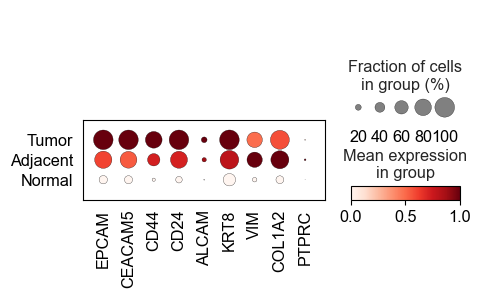

In [20]:
sample_list = ['CRC-P19-T','CRC-P59-T_1','CRC-P59-T_2','CRC-P67-T']
for sample in sample_list:
    rna = sc.read_h5ad(f'../../RNA_cluster/{sample}.rna.h5ad')
    sc.pl.dotplot(rna,['EPCAM','CEACAM5','CD44','CD24','ALCAM','KRT8','VIM','COL1A2','PTPRC'],standard_scale='var',groupby = 'cluster',save=f'-Sup3.{sample}.marker.pdf')

/home/liuyi/miniconda3/envs/scanpy/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:169: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/home/liuyi/miniconda3/envs/scanpy/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:179: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/home/liuyi/miniconda3/envs/scanpy/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatt

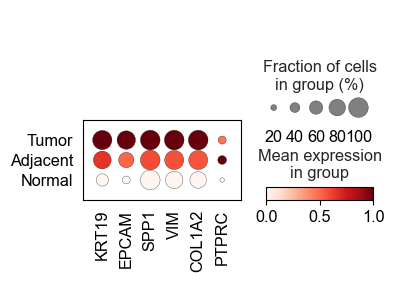

/home/liuyi/miniconda3/envs/scanpy/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:169: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/home/liuyi/miniconda3/envs/scanpy/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:179: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/home/liuyi/miniconda3/envs/scanpy/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatt

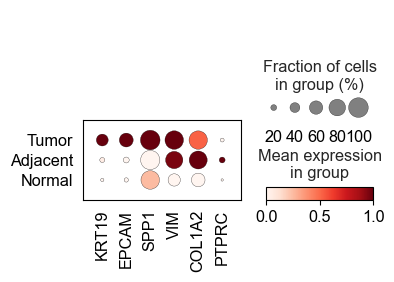

In [19]:
sample_list = ['LC05-M_DU3','LC05-T_FD3']
for sample in sample_list:
    rna = sc.read_h5ad(f'../../RNA_cluster/{sample}.rna.h5ad')
    sc.pl.dotplot(rna,["KRT19","EPCAM","SPP1",'VIM','COL1A2','PTPRC'],standard_scale='var',groupby = 'cluster',save=f'-Sup3.{sample}.marker.pdf')

/home/liuyi/miniconda3/envs/scanpy/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:169: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/home/liuyi/miniconda3/envs/scanpy/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:179: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/home/liuyi/miniconda3/envs/scanpy/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatt

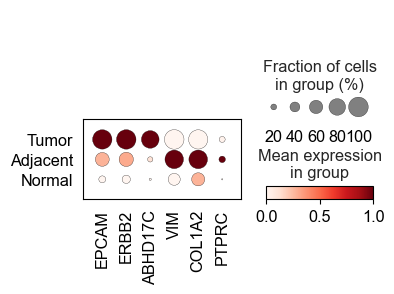

/home/liuyi/miniconda3/envs/scanpy/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:169: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/home/liuyi/miniconda3/envs/scanpy/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:179: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/home/liuyi/miniconda3/envs/scanpy/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatt

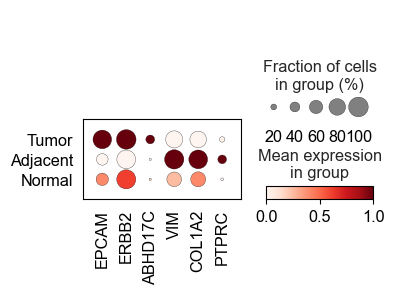

In [18]:
sample_list = ['dcis1','dcis2']
for sample in sample_list:
    rna = sc.read_h5ad(f'../../RNA_cluster/{sample}.rna.h5ad')
    sc.pl.dotplot(rna,["EPCAM","ERBB2",'ABHD17C','VIM','COL1A2','PTPRC'],standard_scale='var',groupby = 'cluster',save=f'-Sup3.{sample}.marker.pdf')

In [21]:
sample_list = ['CRC-P19-T','CRC-P59-T_1','CRC-P59-T_2','CRC-P67-T','LC05-M_DU3','LC05-T_FD3','dcis1','dcis2','slide_RNA']
for sample in sample_list:
    rna = sc.read_h5ad(f'../../RNA_cluster/{sample}.rna.h5ad')
    fig,axs = plt.subplots(figsize = (4,3))
    sc.pl.spatial(rna,color = 'cluster',basis = 'spatial',spot_size = 110,legend_loc=None,show = False,ax = axs,vmax = 'p99.9',cmap = 'Spectral_r')
    fig.savefig(f'./SupFigure/RNA_cluster/{sample}.pdf',bbox_inches = 'tight')
    plt.close()

/home/liuyi/miniconda3/envs/scanpy/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/liuyi/miniconda3/envs/scanpy/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/liuyi/miniconda3/envs/scanpy/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Cate

# SupFigure 1

In [12]:
stat = pd.read_csv('./readstat/stat.summary.csv',sep = '\t',header=None)
platform_to_color = {'Slide-RNA': "#00A1DF", 'Stereo-seq': '#E84B50', 'Visium': '#FAC319','Slide-DNA':'#83BC5B'}

/tmp/ipykernel_3014632/627505940.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = stat , x = 0 ,y = 2,ax = ax,palette=platform_to_color)


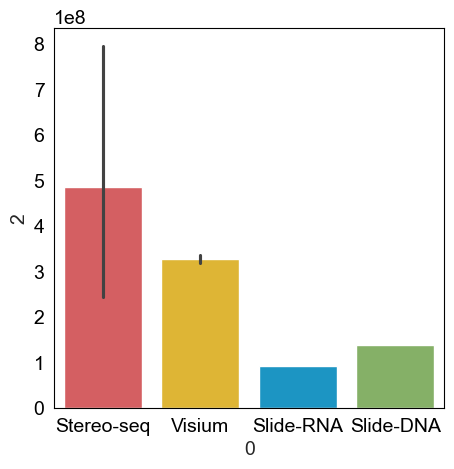

In [14]:
fig,ax = plt.subplots(figsize = (5,5))
sns.barplot(data = stat , x = 0 ,y = 2,ax = ax,palette=platform_to_color)
ax.grid(False)
fig.savefig('./SupFigure/read.stat.pdf')

In [19]:
sample_list = ['CRC-P19-T','CRC-P59-T_1','CRC-P59-T_2','CRC-P67-T','LC05-M_DU3','LC05-T_FD3','dcis1','dcis2','slide_DNA','slide_RNA']
count_dict = {}
for sample in sample_list:
    snv = sc.read_h5ad(f'/storage/liuyi/00.SNP_project/new_article/SNV_process/{sample}.snv.h5ad')
    count_dict[sample] = snv.shape[1]

In [22]:
stat['snv'] = stat[1].map(count_dict)

/tmp/ipykernel_3014632/3953150425.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


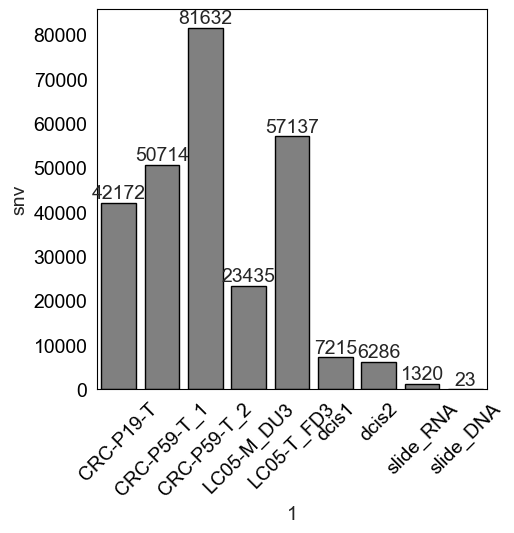

In [33]:
fig,ax = plt.subplots(figsize = (5,5))
bar_plot = sns.barplot(data = stat , x = 1 ,y = 'snv',ax = ax,color = 'grey',edgecolor = 'black')
for p in bar_plot.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), f'{int(p.get_height())}', ha='center', va='bottom')
ax.grid(False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
fig.savefig('./SupFigure/snv.stat.pdf')

# qc

In [34]:
import pandas as pd
import numpy as np
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns

def vector(on=False):
    if on:
        sc.set_figure_params(dpi=50, dpi_save=300, vector_friendly=False)
    else:
        sc.set_figure_params(dpi=50, dpi_save=300, vector_friendly=True)
vector(False)

In [52]:
adata_list = []
for sample_name in ['CRC-P19-T','CRC-P59-T_1','CRC-P59-T_2','CRC-P67-T','LC05-M_DU3','LC05-T_FD3']:
    mtx_path = f"/storage/liuyi/00.SNP_project/new_article/data/{sample_name}/{sample_name}_rna100_matrix/"
    adata = sc.read_10x_mtx(path=f'{mtx_path}/filtered_feature_bc_matrix',cache=True)
    sc.pp.filter_cells(adata, min_genes = 200)
    sc.pp.filter_genes(adata, min_cells = 10)
    adata.var["mt"] = adata.var_names.str.startswith("MT-")
    adata = adata[:,~adata.var['gene_ids'].map(lambda x : x.startswith('Rpl') or x.startswith('Rps'))].copy()
    sc.pp.calculate_qc_metrics(adata, qc_vars=["mt"], percent_top=None, log1p=False, inplace=True)
    adata.obs_names = adata.obs_names.map(lambda x : f'{sample_name}@{x}')
    adata_list.append(adata)
    print(sample_name)

CRC-P19-T
CRC-P59-T_1
CRC-P59-T_2
CRC-P67-T
LC05-M_DU3
LC05-T_FD3


In [53]:
total_adata = sc.concat(adata_list,join = 'outer')

In [54]:
total_adata.obs['sample'] = total_adata.obs_names.map(lambda x : x.split('@')[0])

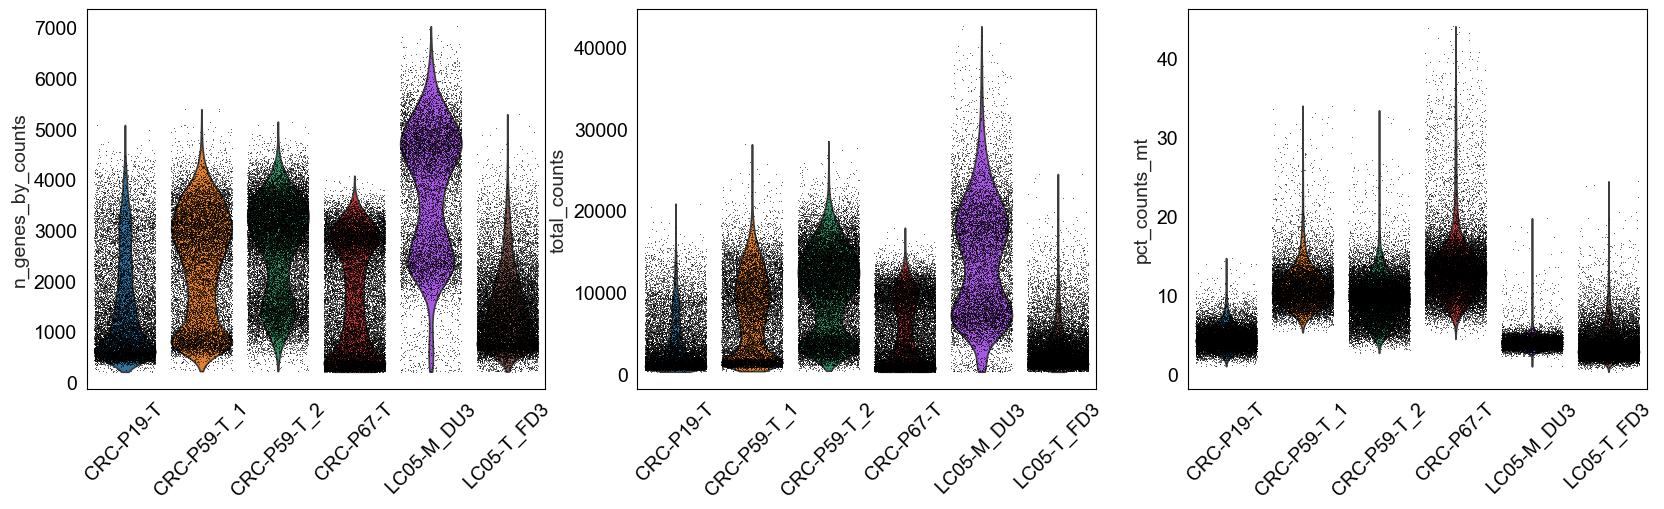

In [65]:
fig,axs = plt.subplots(1,3,figsize = (20,5) )
sc.pl.violin(total_adata,["n_genes_by_counts"],jitter=0.4,show =False,ax = axs[0],groupby = 'sample',size = 0.5,rotation =45,)
axs[0].grid(False)
sc.pl.violin(total_adata,[ "total_counts"],jitter=0.4,show =False,ax = axs[1],groupby = 'sample',size = 0.5,rotation =45)
axs[1].grid(False)
sc.pl.violin(total_adata,["pct_counts_mt"],jitter=0.4,show =False,ax = axs[2],groupby = 'sample',size = 0.5,rotation =45)
axs[2].grid(False)
fig.savefig('./SupFigure/rna.qc.png',dpi = 600,bbox_inches = 'tight')

In [66]:
adata_list = []
for sample_name in ['dcis1','dcis2']:
    mtx_path = f"/storage/liuyi/00.SNP_project/new_article/data/{sample_name}/{sample_name}_rna_matrix/"
    adata = sc.read_10x_mtx(path=f'{mtx_path}/filtered_feature_bc_matrix',cache=True)
    sc.pp.filter_cells(adata, min_genes = 200)
    sc.pp.filter_genes(adata, min_cells = 10)
    adata.var["mt"] = adata.var_names.str.startswith("MT-")
    adata = adata[:,~adata.var['gene_ids'].map(lambda x : x.startswith('Rpl') or x.startswith('Rps'))].copy()
    sc.pp.calculate_qc_metrics(adata, qc_vars=["mt"], percent_top=None, log1p=False, inplace=True)
    adata.obs_names = adata.obs_names.map(lambda x : f'{sample_name}@{x}')
    adata_list.append(adata)
    print(sample_name)

dcis1
dcis2


In [67]:
total_adata = sc.concat(adata_list,join = 'outer')

In [68]:
total_adata.obs['sample'] = total_adata.obs_names.map(lambda x : x.split('@')[0])

In [74]:
fig,axs = plt.subplots(1,3,figsize = (15,5) )
sc.pl.violin(total_adata,["n_genes_by_counts"],jitter=0.4,show =False,ax = axs[0],groupby = 'sample',size = 0.5,rotation =45,)
axs[0].grid(False)
sc.pl.violin(total_adata,[ "total_counts"],jitter=0.4,show =False,ax = axs[1],groupby = 'sample',size = 0.5,rotation =45)
axs[1].grid(False)
sc.pl.violin(total_adata,["pct_counts_mt"],jitter=0.4,show =False,ax = axs[2],groupby = 'sample',size = 0.5,rotation =45)
axs[2].grid(False)
fig.subplots_adjust(wspace=0.4)  # wspace 控制宽度间距，hs
fig.savefig('./SupFigure/rna.qc.visium.png',dpi = 600,bbox_inches = 'tight')

In [75]:
adata_list = []
for sample_name in ['slide_RNA']:
    mtx_path = f"/storage/liuyi/00.SNP_project/new_article/data/{sample_name}/{sample_name}_rna_matrix/"
    adata = sc.read_10x_mtx(path=f'{mtx_path}/filtered_feature_bc_matrix',cache=True)
    sc.pp.filter_cells(adata, min_genes = 200)
    sc.pp.filter_genes(adata, min_cells = 10)
    adata.var["mt"] = adata.var_names.str.startswith("MT-")
    adata = adata[:,~adata.var['gene_ids'].map(lambda x : x.startswith('Rpl') or x.startswith('Rps'))].copy()
    sc.pp.calculate_qc_metrics(adata, qc_vars=["mt"], percent_top=None, log1p=False, inplace=True)
    adata.obs_names = adata.obs_names.map(lambda x : f'{sample_name}@{x}')
    adata_list.append(adata)
    print(sample_name)

slide_RNA


In [76]:
total_adata = sc.concat(adata_list,join = 'outer')

In [77]:
total_adata.obs['sample'] = total_adata.obs_names.map(lambda x : x.split('@')[0])

In [81]:
fig,axs = plt.subplots(1,3,figsize = (8,5) )
sc.pl.violin(total_adata,["n_genes_by_counts"],jitter=0.4,show =False,ax = axs[0],groupby = 'sample',size = 0.5,rotation =45,)
axs[0].grid(False)
sc.pl.violin(total_adata,[ "total_counts"],jitter=0.4,show =False,ax = axs[1],groupby = 'sample',size = 0.5,rotation =45)
axs[1].grid(False)
sc.pl.violin(total_adata,["pct_counts_mt"],jitter=0.4,show =False,ax = axs[2],groupby = 'sample',size = 0.5,rotation =45)
axs[2].grid(False)
fig.subplots_adjust(wspace=0.6)  # wspace 控制宽度间距，hs
fig.savefig('./SupFigure/rna.qc.slide.png',dpi = 600,bbox_inches = 'tight')